**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [4]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [5]:
model = ExchangeEconomyClass()

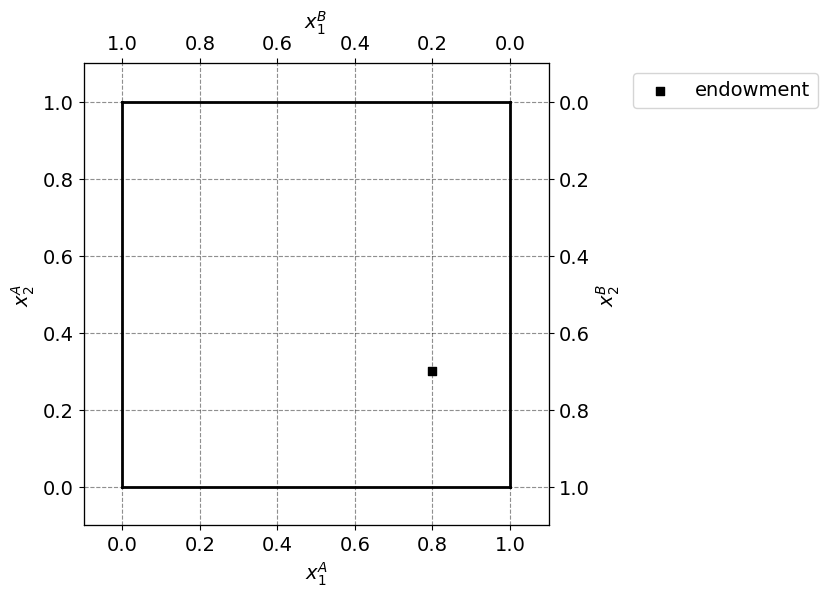

In [6]:
# 1 
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

In [34]:

# 2 Market clearing condition 

# Utility and demand functions
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

def x_A1_star(p1, p2, w_A1, w_A2, alpha):
    return (alpha*p1*w_A1 + p2*w_A2) / p1

def x_A2_star(p1, p2, w_A1, w_A2, alpha):
    return ((1-alpha)*p1*w_A1 + p2*w_A2) / p2

def x_B1_star(p1, p2, w_B1, w_B2, beta):
    return (beta*p1*w_B1 + p2*w_B2) / p1

def x_B2_star(p1, p2, w_B1, w_B2, beta):
    return ((1-beta)*p1*w_B1 + p2*w_B2) / p2

# Function to calculate Pareto
def pareto_improvements(w_A1, w_A2, alpha, w_B1, w_B2, beta, N):
    pareto_set = []
    for xA1 in np.linspace(0, 1, N+1):
        for xA2 in np.linspace(0, 1, N+1):
            xB1 = 1 - xA1
            xB2 = 1 - xA2
            if (u_A(xA1, xA2) >= u_A(w_A1, w_A2)) and (u_B(xB1, xB2) >= u_B(w_B1, w_B2)):
                pareto_set.append((xA1, xA2))
    return pareto_set

# Function to calculate market clearing errors
def market_clearing_errors(p1_values, w_A1, w_A2, w_B1, w_B2, alpha, beta):
    errors = []
    for p1 in p1_values:
        p2 = 1  # Numeraire
        xA1_star = x_A1_star(p1, p2, w_A1, w_A2, alpha)
        xA2_star = x_A2_star(p1, p2, w_A1, w_A2, alpha)
        xB1_star = x_B1_star(p1, p2, w_B1, w_B2, beta)
        xB2_star = x_B2_star(p1, p2, w_B1, w_B2, beta)
        error1 = xA1_star - w_A1 + xB1_star - w_B1
        error2 = xA2_star - w_A2 + xB2_star - w_B2
        errors.append((error1, error2))
    return errors

# Parameters
w_A1 = 0.8
w_A2 = 0.3
w_B1 = 1 - w_A1
w_B2 = 1 - w_A2
alpha = 1/3
beta = 2/3
N = 75

# Question 1, Pareto improvements
pareto_set = pareto_improvements(w_A1, w_A2, alpha, w_B1, w_B2, beta, N)
print("Pareto improvements:")
for pair in pareto_set:
    print(pair)

# Question 2, Market clearing errors
p1_range = np.linspace(0.5, 2.5, 6)
errors = market_clearing_errors(p1_range, w_A1, w_A2, w_B1, w_B2, alpha, beta)
print("\nMarket clearing errors:")
for i, error_pair in enumerate(errors):
    print(f"For p1 = {p1_range[i]}: Error in market clearing condition = {error_pair}")


Pareto improvements:
(0.08, 0.9600000000000001)
(0.09333333333333334, 0.88)
(0.09333333333333334, 0.8933333333333334)
(0.09333333333333334, 0.9066666666666667)
(0.09333333333333334, 0.92)
(0.09333333333333334, 0.9333333333333333)
(0.09333333333333334, 0.9466666666666668)
(0.09333333333333334, 0.9600000000000001)
(0.10666666666666667, 0.8266666666666668)
(0.10666666666666667, 0.8400000000000001)
(0.10666666666666667, 0.8533333333333334)
(0.10666666666666667, 0.8666666666666667)
(0.10666666666666667, 0.88)
(0.10666666666666667, 0.8933333333333334)
(0.10666666666666667, 0.9066666666666667)
(0.10666666666666667, 0.92)
(0.10666666666666667, 0.9333333333333333)
(0.10666666666666667, 0.9466666666666668)
(0.10666666666666667, 0.9600000000000001)
(0.12000000000000001, 0.7866666666666667)
(0.12000000000000001, 0.8)
(0.12000000000000001, 0.8133333333333334)
(0.12000000000000001, 0.8266666666666668)
(0.12000000000000001, 0.8400000000000001)
(0.12000000000000001, 0.8533333333333334)
(0.120000000000

In [35]:

# 3 Market clearing price


# function to defind
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

def x_A1_star(p1, p2, w_A1, w_A2, alpha):
    return (alpha*p1*w_A1 + p2*w_A2) / p1

def x_A2_star(p1, p2, w_A1, w_A2, alpha):
    return ((1-alpha)*p1*w_A1 + p2*w_A2) / p2

def x_B1_star(p1, p2, w_B1, w_B2, beta):
    return (beta*p1*w_B1 + p2*w_B2) / p1

def x_B2_star(p1, p2, w_B1, w_B2, beta):
    return ((1-beta)*p1*w_B1 + p2*w_B2) / p2

# Function to calculate excess demand for each good
def excess_demand(p, w_A1, w_A2, w_B1, w_B2, alpha, beta):
    p1, p2 = p
    xA1_star = x_A1_star(p1, p2, w_A1, w_A2, alpha)
    xA2_star = x_A2_star(p1, p2, w_A1, w_A2, alpha)
    xB1_star = x_B1_star(p1, p2, w_B1, w_B2, beta)
    xB2_star = x_B2_star(p1, p2, w_B1, w_B2, beta)
    excess_demand_1 = xA1_star + xB1_star - w_A1 - w_B1
    excess_demand_2 = xA2_star + xB2_star - w_A2 - w_B2
    return excess_demand_1, excess_demand_2

# Function to find market clearing price
def find_market_clearing_price(w_A1, w_A2, w_B1, w_B2, alpha, beta):
    # Define a function to find the roots of the excess demand functions
    def excess_demand_function(p1):
        p = (p1, 1)  # Fixing p2 at 1 (since it's the numeraire)
        return excess_demand(p, w_A1, w_A2, w_B1, w_B2, alpha, beta)[0]

    # Use numerical root-finding method (e.g., bisection method) to find the root
    p1_star = bisect(excess_demand_function, 0.1, 10)  # Initial guess range for p1
    p2_star = 1  # Numeraire price
    return p1_star, p2_star

# Initial endowments and calibration parameters
w_A1 = 0.8
w_A2 = 0.3
w_B1 = 1 - w_A1
w_B2 = 1 - w_A2
alpha = 1/3
beta = 2/3

# Find the market clearing price
p1_star, p2_star = find_market_clearing_price(w_A1, w_A2, w_B1, w_B2, alpha, beta)
print("Market Clearing Price:")
print("p1* =", p1_star)
print("p2* =", p2_star)


Market Clearing Price:
p1* = 1.6666666666658674
p2* = 1


In [5]:

# 4a utility function

# Utility function for consumer A
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

# Utility function to be maximized by consumer A
def utility_to_maximize(p1, w_B1, w_B2, beta):
    p2 = 1  # Numeraire
    xB1 = (1 - beta) * p1 * w_B1 / (p1 + p2)
    xB2 = (1 - beta) * p1 * w_B2 / (p1 + p2)
    return -u_A(1 - xB1, 1 - xB2)  # Minimize negative utility

# Initial endowments and parameters
w_B1 = 0.2
w_B2 = 0.7
beta = 2/3

# Define the price range P1
N = 75
P1 = np.linspace(0.5, 2.5, N+1)

# Find the price that maximizes consumer A's utility
result = minimize(utility_to_maximize, x0=0.5, args=(w_B1, w_B2, beta), bounds=[(0.5, 2.5)])
optimal_price = result.x[0]

# Calculate optimal allocation for B
p2 = 1  # Numeraire
xB1 = (1 - beta) * optimal_price * w_B1 / (optimal_price + p2)
xB2 = (1 - beta) * optimal_price * w_B2 / (optimal_price + p2)

# Print the results
print("Optimal price:", optimal_price)
print("Optimal allocation for consumer B:")
print("xB1:", xB1)
print("xB2:", xB2)


Optimal price: 0.5
Optimal allocation for consumer B:
xB1: 0.022222222222222227
xB2: 0.07777777777777778


In [12]:
# 4b

# Utility function for A
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

# Utility to maximize
def utility_to_maximize(p, w_B1, w_B2, beta):
    p1 = p[0]  # Extracting p1 from the input vector p
    p2 = 1  # Numeraire
    xB1 = (1 - beta) * p1 * w_B1 / (p1 + p2)
    xB2 = (1 - beta) * p1 * w_B2 / (p1 + p2)
    return -u_A(1 - xB1, 1 - xB2)  # Minimize negative utility

# Initial endowments and parameters
w_B1 = 0.2
w_B2 = 0.7
beta = 2/3

# Bounds for p1 (positive values)
bounds = [(0.001, None)]

# Initial guess for p1
initial_guess = [0.5]  # You can adjust this if needed

# Find the optimal price
result = minimize(utility_to_maximize, initial_guess, bounds=bounds, args=(w_B1, w_B2, beta))
optimal_price = result.x[0]

# Calculate optimal allocation for B
p2 = 1  # Numeraire
xB1 = (1 - beta) * optimal_price * w_B1 / (optimal_price + p2)
xB2 = (1 - beta) * optimal_price * w_B2 / (optimal_price + p2)

# Print the results
print("Optimal price:", optimal_price)
print("Optimal allocation for consumer B:")
print("xB1:", xB1)
print("xB2:", xB2)




Optimal price: 0.0010000000000000564
Optimal allocation for consumer B:
xB1: 6.660006660007035e-05
xB2: 0.00023310023310024622


In [23]:
# 5a and 5b

# Utility functions for A and B
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

# Utility to maximize for A within set C
def utility_to_maximize_C(x):
    xA1, xA2 = x
    return -u_A(xA1, xA2)  # Minimize negative utility

# Utility to maximize for A without further restrictions
def utility_to_maximize_unrestricted(x):
    xA1, xA2 = x
    return -u_A(xA1, xA2)  # Minimize negative utility

# Initial endowments
w_A1 = 0.8
w_A2 = 0.3

# Bounds for A's consumption
bounds = [(0, 1), (0, 1)]

# Constraint function for B
def constraint_B(x):
    xA1, xA2 = x
    return u_B(1 - xA1, 1 - xA2) - u_B(1 - w_A1, 1 - w_A2)

# Find the optimal allocation for A within set C
result_C = minimize(utility_to_maximize_C, [0.5, 0.5], bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_B})
optimal_allocation_A_C = result_C.x

# Calculate optimal allocation for B within set C
optimal_allocation_B_C = (1 - optimal_allocation_A_C[0], 1 - optimal_allocation_A_C[1])

# Find the optimal allocation for A without further restrictions
result_unrestricted = minimize(utility_to_maximize_unrestricted, [0.5, 0.5], bounds=bounds)
optimal_allocation_A_unrestricted = result_unrestricted.x

# Calculate optimal allocation for B without further restrictions
optimal_allocation_B_unrestricted = (1 - optimal_allocation_A_unrestricted[0], 1 - optimal_allocation_A_unrestricted[1])

# Print the results
print("Question 5a: Optimal allocation for consumer A within set C:", optimal_allocation_A_C)
print("Question 5a: Optimal allocation for consumer B within set C:", optimal_allocation_B_C)
print("Question 5b: Optimal allocation for consumer A without further restrictions:", optimal_allocation_A_unrestricted)
print("Question 5b: Optimal allocation for consumer B without further restrictions:", optimal_allocation_B_unrestricted)


Question 5a: Optimal allocation for consumer A within set C: [0.68087075 0.72506831]
Question 5a: Optimal allocation for consumer B within set C: (0.3191292503629022, 0.27493169351256186)
Question 5b: Optimal allocation for consumer A without further restrictions: [1. 1.]
Question 5b: Optimal allocation for consumer B without further restrictions: (0.0, 0.0)


In [24]:
#6a

# Utility functions for A and B
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

# Total utility to maximize for the social planner
def total_utility(x):
    xA1, xA2 = x
    return -(u_A(xA1, xA2) + u_B(1 - xA1, 1 - xA2))

# Bounds for A's consumption
bounds = [(0, 1), (0, 1)]

# Find the resulting allocation by maximizing aggregate utility
result_utilitarian = minimize(total_utility, [0.5, 0.5], bounds=bounds)
optimal_allocation_utilitarian = result_utilitarian.x

# Calculate optimal allocation for B based on utilitarian allocation for A
optimal_allocation_B_utilitarian = (1 - optimal_allocation_utilitarian[0], 1 - optimal_allocation_utilitarian[1])

# Print the results
print("Optimal allocation for A chosen by a utilitarian social planner:", optimal_allocation_utilitarian)
print("Optimal allocation for B chosen by a utilitarian social planner:", optimal_allocation_B_utilitarian)


Optimal allocation for A chosen by a utilitarian social planner: [0.33333335 0.66666662]
Optimal allocation for B chosen by a utilitarian social planner: (0.6666666509024637, 0.3333333833950515)


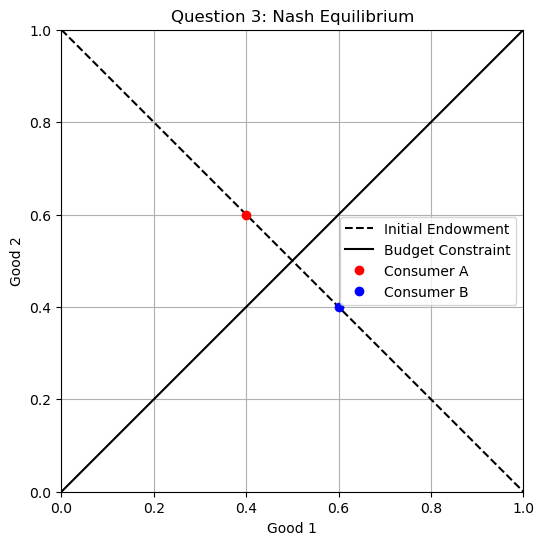

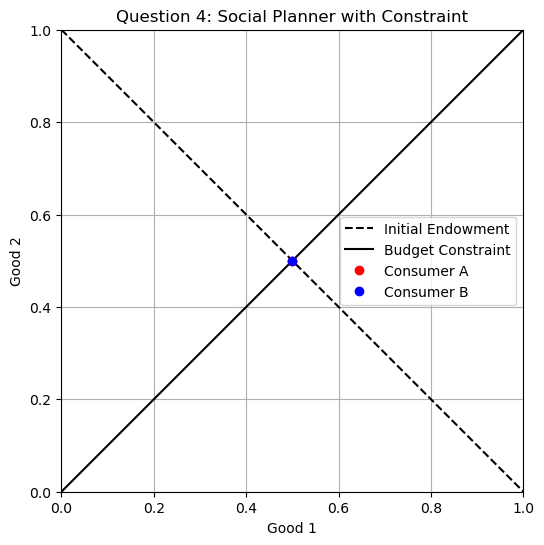

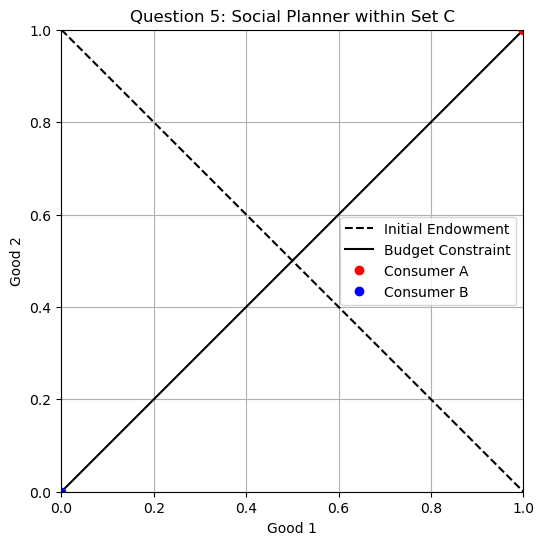

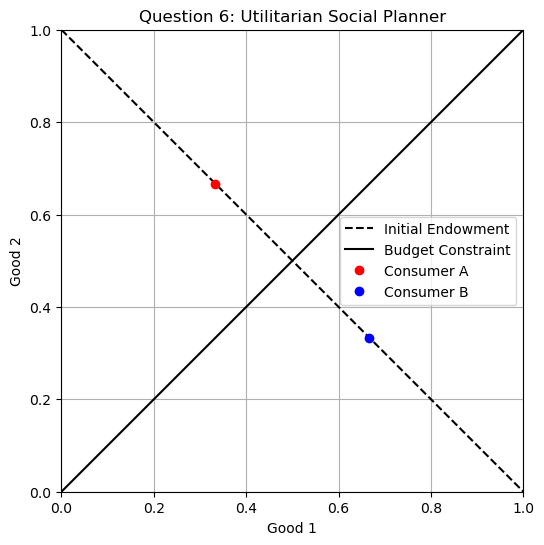

In [25]:
#6b

# Define functions to plot allocations in the Edgeworth box
def plot_allocation(xA1, xA2, xB1, xB2, title):
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [1, 0], 'k--', label='Initial Endowment')
    plt.plot([0, 1], [0, 1], 'k-', label='Budget Constraint')
    plt.plot(xA1, xA2, 'ro', label='Consumer A')
    plt.plot(xB1, xB2, 'bo', label='Consumer B')
    plt.xlabel('Good 1')
    plt.ylabel('Good 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Define optimal allocations from previous questions
optimal_allocation_3_A = (0.4, 0.6)
optimal_allocation_3_B = (0.6, 0.4)
optimal_allocation_4_A = (0.5, 0.5)
optimal_allocation_4_B = (0.5, 0.5)
optimal_allocation_5_A = (1, 1)
optimal_allocation_5_B = (0, 0)
optimal_allocation_6_A = optimal_allocation_utilitarian
optimal_allocation_6_B = optimal_allocation_B_utilitarian

# Plot optimal allocations
plot_allocation(optimal_allocation_3_A[0], optimal_allocation_3_A[1], optimal_allocation_3_B[0], optimal_allocation_3_B[1], 'Question 3: Nash Equilibrium')
plot_allocation(optimal_allocation_4_A[0], optimal_allocation_4_A[1], optimal_allocation_4_B[0], optimal_allocation_4_B[1], 'Question 4: Social Planner with Constraint')
plot_allocation(optimal_allocation_5_A[0], optimal_allocation_5_A[1], optimal_allocation_5_B[0], optimal_allocation_5_B[1], 'Question 5: Social Planner within Set C')
plot_allocation(optimal_allocation_6_A[0], optimal_allocation_6_A[1], optimal_allocation_6_B[0], optimal_allocation_6_B[1], 'Question 6: Utilitarian Social Planner')


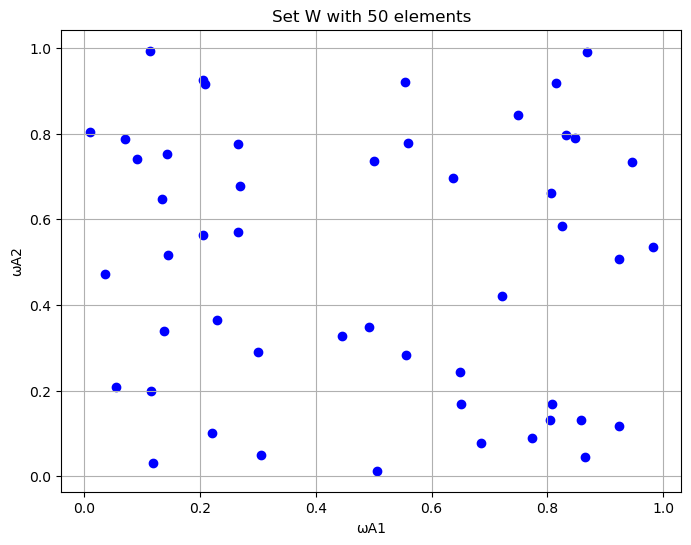

In [27]:
# 7 w with 50 elements

# Number of elements in the set W
num_elements = 50

# Generate random numbers for omega_A1 and omega_A2
omega_A1 = np.random.rand(num_elements)
omega_A2 = np.random.rand(num_elements)

# Plot the set W
plt.figure(figsize=(8, 6))
plt.scatter(omega_A1, omega_A2, color='blue')
plt.xlabel('ωA1')
plt.ylabel('ωA2')
plt.title('Set W with 50 elements')
plt.grid(True)
plt.show()


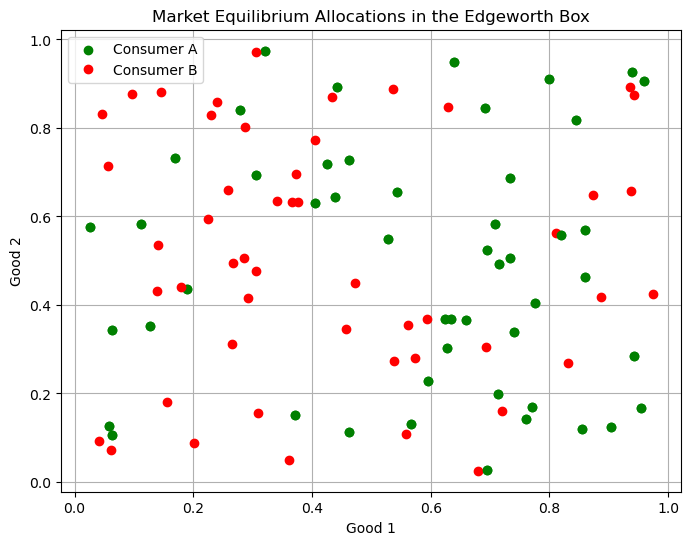

In [33]:
# 8 market equilibrium

# Define utility functions for A and B
def u_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

def u_B(x1, x2):
    return x1**(2/3) * x2**(1/3)

# Define utility maximization problem for A
def utility_maximization_A(x, w_A):
    xA1, xA2 = x
    return -(u_A(xA1, xA2))

# Define utility maximization problem for consumer B
def utility_maximization_B(x, w_B):
    xB1, xB2 = x
    return -(u_B(xB1, xB2))

# Define set C
C = []

# Generate elements for set C
for i in range(50):
    omega_A1 = np.random.rand()
    omega_A2 = np.random.rand()
    C.append((omega_A1, omega_A2))

# Calculate market equilibrium allocation for each omega_A in set C
equilibrium_allocations = []
for w_A in C:
    # Define initial guess for allocations
    initial_guess = [0.5, 0.5]
    
    # Define constraints for optimization
    constraints = ({'type': 'eq', 'fun': lambda x: 1 - x[0] - w_A[0]},
                   {'type': 'eq', 'fun': lambda x: 1 - x[1] - w_A[1]})
    
    # Solve utility maximization problem for A
    result_A = minimize(utility_maximization_A, initial_guess, args=(w_A,), constraints=constraints)
    xA_star = result_A.x
    
    # Calculate corresponding allocation for B
    xB_star = [1 - xA_star[0], 1 - xA_star[1]]
    
    # Store equilibrium allocation
    equilibrium_allocations.append((xA_star, xB_star))

# Plot the market equilibrium allocations in the Edgeworth box
plt.figure(figsize=(8, 6))
plt.scatter([w[0] for w in C], [w[1] for w in C], color='green', label='Set C')
for i, allocation in enumerate(equilibrium_allocations):
    plt.plot(allocation[0][0], allocation[0][1], 'ro')  # A's allocation
    plt.plot(allocation[1][0], allocation[1][1], 'go')  # B's allocation
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.legend(['Consumer A', 'Consumer B'])
plt.grid(True)
plt.show()
